In [38]:
import numpy as np
import pandas as pd
from scipy.ndimage import convolve1d
from matplotlib import pyplot as plt

In [66]:
dataframe = pd.read_csv('/Users/julian/Documents/daten/STUDIUM Master/FabLab 2025/Codebase/MouseMemoryGraph/data/a2024-11-01T14_30_53DLC_resnet50_fearbox_optoJan27shuffle1_100000.csv', header=1)
dataframe = dataframe.drop(dataframe.index[0])
dataframe['head_x'] = dataframe['head'].astype(float)
dataframe['head_y'] = dataframe['head.1'].astype(float)
dataframe['tail_x'] = dataframe['middle tail'].astype(float)
dataframe['tail_y'] = dataframe['middle tail.1'].astype(float)
dataframe['base_x'] = dataframe['base tail'].astype(float)
dataframe['base_y'] = dataframe['base tail.1'].astype(float)

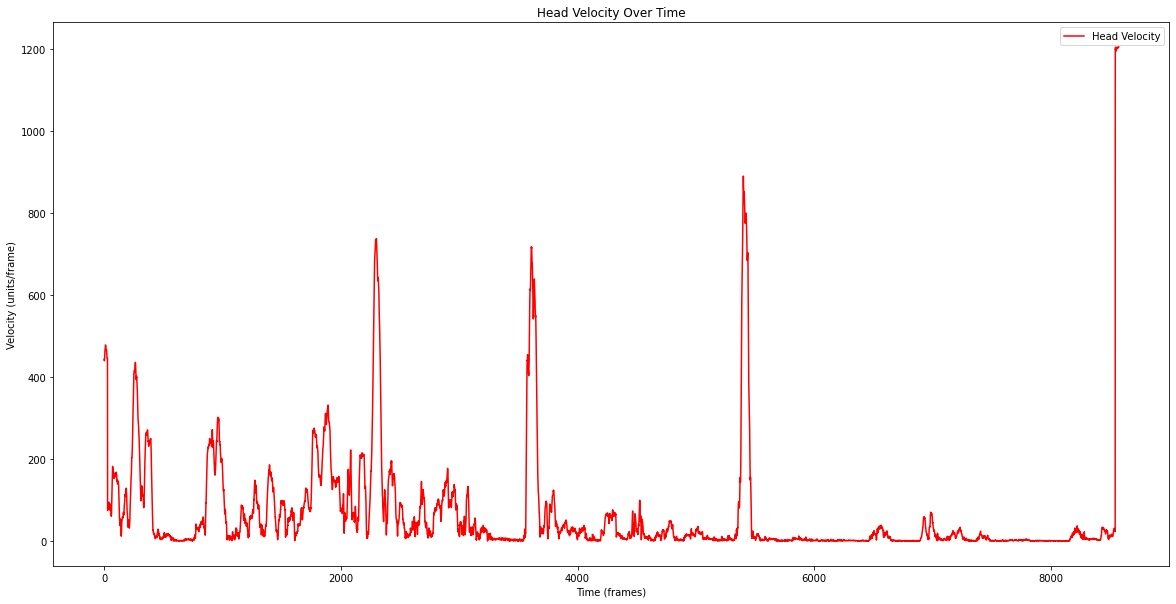

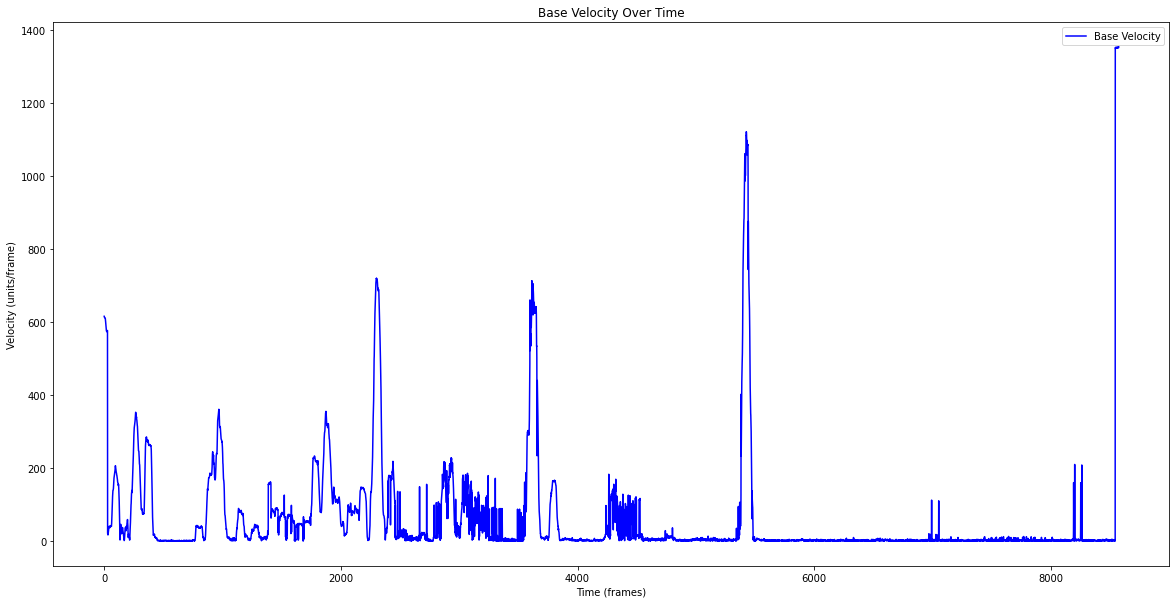

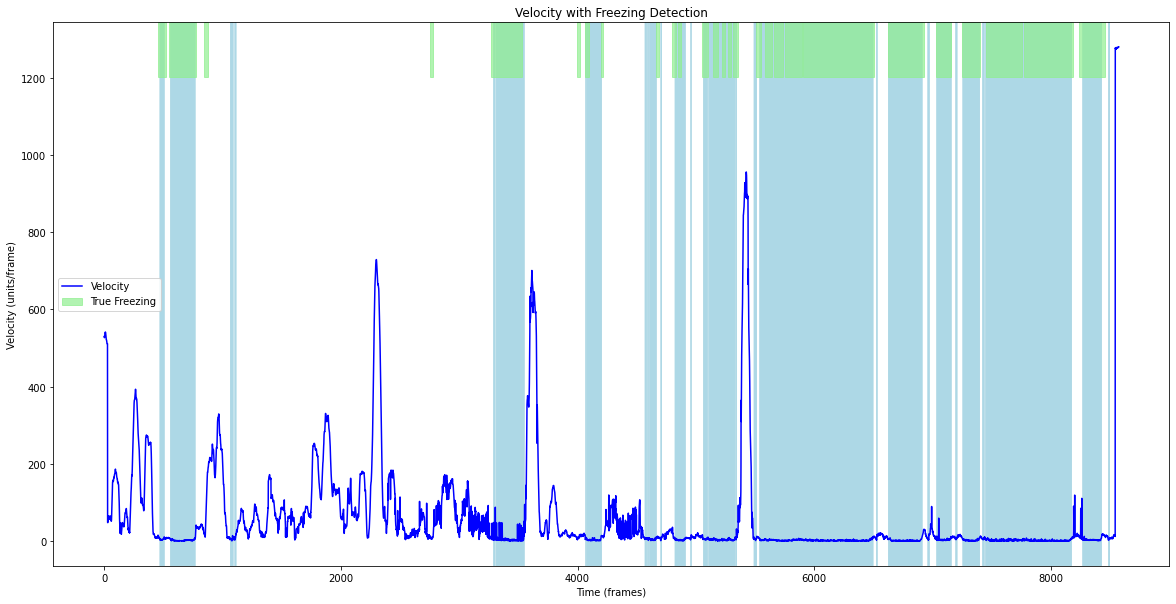

In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.ndimage import convolve1d

def smooth_coordinates(dataframe, window_width=60):
    kernel = np.ones(window_width)
    base_convolved_x = convolve1d(dataframe['base_x'], kernel, mode='constant')
    base_convolved_y = convolve1d(dataframe['base_y'], kernel, mode='constant')
    head_convolved_x = convolve1d(dataframe['head_x'], kernel, mode='constant')
    head_convolved_y = convolve1d(dataframe['head_y'], kernel, mode='constant')
    return base_convolved_x, base_convolved_y, head_convolved_x, head_convolved_y

def calculate_velocity(convolved_x, convolved_y):
    return np.sqrt(np.diff(convolved_x)**2 + np.diff(convolved_y)**2)

def plot_velocity(velocity, color, label, title):
    plt.figure(figsize=(20, 10))
    plt.plot(velocity, color=color, label=label)
    plt.title(title)
    plt.xlabel('Time (frames)')
    plt.ylabel('Velocity (units/frame)')
    plt.legend()
    plt.show()

def detect_freezing(velocity, window_width=5, threshold=6):
    head_freezing = np.zeros(len(velocity))
    for i in range(window_width, len(velocity)):
        if velocity[max(i-(window_width//2), 0):min(i+(window_width//2), len(velocity))].mean() < threshold:
            head_freezing[i] = 1
    kernel = np.ones(10)
    head_freezing = convolve1d(head_freezing, kernel, mode='constant')
    return head_freezing > 2

def plot_freezing(velocity, head_freezing, freezing_true, title):
    plt.figure(figsize=(20, 10))
    plt.plot(velocity, color='blue', label='Velocity')
    for i in range(len(head_freezing)):
        if head_freezing[i] == 1:
            plt.axvspan(i, i+1, color='lightblue', alpha=0.3, label='Freezing Detected' if i == 0 else "")
    for i in range(len(freezing_true)):
        plt.axvspan(freezing_true[i][0], freezing_true[i][1], ymin=0.9, color='lightgreen', alpha=0.7, label='True Freezing' if i == 0 else "")
    plt.title(title)
    plt.xlabel('Time (frames)')
    plt.ylabel('Velocity (units/frame)')
    plt.legend()
    plt.show()


base_convolved_x, base_convolved_y, head_convolved_x, head_convolved_y = smooth_coordinates(dataframe)
base_velocity = calculate_velocity(base_convolved_x, base_convolved_y)
head_velocity = calculate_velocity(head_convolved_x, head_convolved_y)

plot_velocity(head_velocity, 'red', 'Head Velocity', 'Head Velocity Over Time')
plot_velocity(base_velocity, 'blue', 'Base Velocity', 'Base Velocity Over Time')

velocity = (base_velocity + head_velocity) / 2
head_freezing = detect_freezing(velocity)

freezing_true = np.array([[453, 525], [545, 775], [845, 880], [2757, 2776], [3270, 3531], [3998, 4022], [4065, 4095], [4197, 4217], [4659, 4691], [4802, 4835], [4849, 4873], [5050, 5101], [5141, 5190], [5221, 5248], [5268, 5300], [5317, 5356], [5508, 5548], [5581, 5641], [5661, 5736], [5750, 5898], [5907, 6502], [6620, 6931], [7025, 7156], [7247, 7402], [7455, 7758], [7773, 8188], [8239, 8455]])

plot_freezing(velocity, head_freezing, freezing_true, 'Velocity with Freezing Detection')